In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit,njit,float64,int32
import numba as nb
import pandas as pd
from derivative import dxdt

# Parameters

In [107]:
tiempo_vida_inicial = 0
tiempo_vida_maximo = 150            #Para que los resultados obtenidos se encuentren ligados a realidad biologica
pasos_integracion = tiempo_vida_maximo-  tiempo_vida_inicial         #Definicion de los pasos de integracion de algoritmo   #Tasa de propagacion de daño
condicion_inicial = 0.05
h = (tiempo_vida_maximo-tiempo_vida_inicial)/pasos_integracion   

# Functions

In [134]:
def f(x, alpha_damage_propagation, disease_rate, t=None):
    return alpha_damage_propagation*x + disease_rate

def Runke_Kutta_Method(temporal_evolution:list, disease_rate):
    x = condicion_inicial                                        #Initial condition     
    frailty_index = np.empty((len(temporal_evolution)))
    for index, t in enumerate(temporal_evolution):
        frailty_index[index] = x
        k1 = h*f(x, alpha_damage_propagation, disease_rate, t=t)
        k2 = h*f(x+0.5*k1, alpha_damage_propagation, disease_rate, t=t +0.5*h)
        x += k2

    gompertz_law = mortality_rate*(frailty_index**(coupling_factor/alpha_damage_propagation))
    return frailty_index, gompertz_law, temporal_evolution

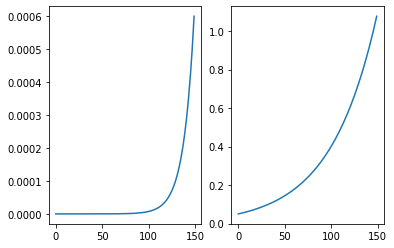

In [135]:
disease_rate_steps = [0.0001]
alpha_damage_propagation = 0.02
coupling_factor = 0.089             #Factor de acoplamiento entre frailty index y gompertz
mortality_rate = 4.3*(10**(-4))     #Tasa de mortalidad
gamma_factor = 0.01

temporal_evolution = np.arange(tiempo_vida_inicial,tiempo_vida_maximo,h) 
frailty_index_differential_equation,gompertz_law_differential_equation,temporal_evolution_differential_equation = Runke_Kutta_Method(temporal_evolution, disease_rate_steps[0])

plt.subplot(1,2,1)
plt.plot(gompertz_law_differential_equation)
plt.subplot(1,2,2)
plt.plot(frailty_index_differential_equation)


# Numerical Solution

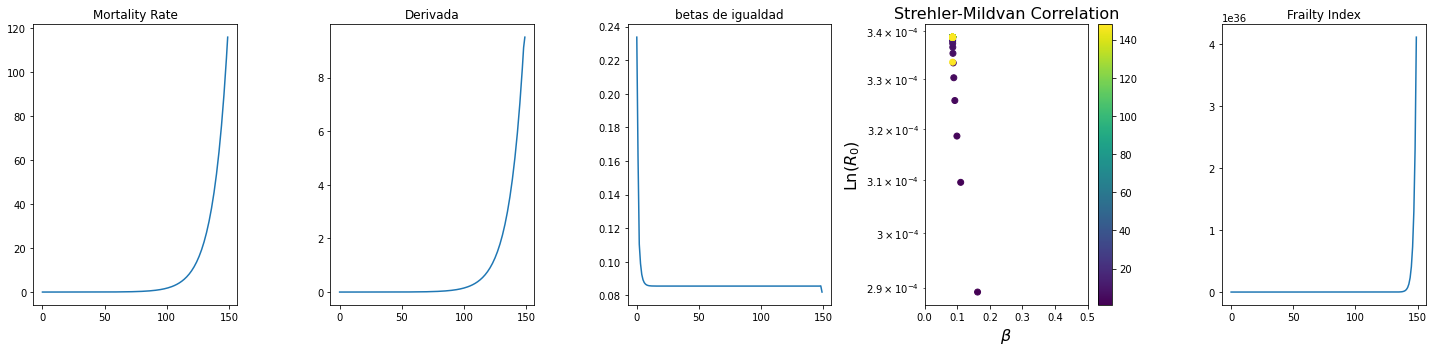

In [136]:
disease_rate_steps = [0.09]
alpha_damage_propagation = 0.6
coupling_factor = 0.089             #Factor de acoplamiento entre frailty index y gompertz
mortality_rate = 4.3*(10**(-4))     #Tasa de mortalidad


temporal_evolution = np.arange(tiempo_vida_inicial,tiempo_vida_maximo,h) 
frailty_index_differential_equation,gompertz_law_differential_equation,temporal_evolution_differential_equation = Runke_Kutta_Method(temporal_evolution, disease_rate_steps[0])


valores_beta_R = np.empty((2), dtype = object)
temporal_evolution = temporal_evolution_differential_equation
data = gompertz_law_differential_equation
derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
beta_values = derivative_process/data
R_values = data/np.e**(beta_values*temporal_evolution)

valores_beta_R[0] = beta_values
valores_beta_R[1] = R_values

plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.title("Mortality Rate")
plt.plot(temporal_evolution, data)

plt.subplot(1,5,2)
plt.title("Derivada")
plt.plot(temporal_evolution, derivative_process)

plt.subplot(1,5,3)
plt.title("betas de igualdad")
plt.plot(temporal_evolution, beta_values)


plt.subplot(1,5,4)
plt.title(r"Strehler-Mildvan Correlation", fontsize = 16)
inicial = 1
final = -1

cmap = 'viridis'

plt.scatter(valores_beta_R[0][inicial:final], valores_beta_R[1][inicial:final], c=temporal_evolution[inicial:final], cmap=cmap)
plt.colorbar()

plt.xlabel(r"$\beta$", fontsize = 16)
plt.ylabel(r"Ln($R_0$)", fontsize = 16)
plt.yscale("log")
plt.tight_layout()
plt.xlim(0,0.5)

plt.subplot(1,5,5)
plt.title("Frailty Index")
plt.plot(temporal_evolution, frailty_index_differential_equation)

In [ ]:
plt.plot(temporal_evolution, data/np.e**((derivative_process/data)*temporal_evolution))